# Understanding classification and avoiding overfitting

In [1]:
import os
import pandas as pd
PATH = '/home/sourav/Downloads/datasets'


In [2]:
os.listdir(PATH)

['overfitting.csv',
 'Testing_BelgiumTraffic',
 'MNIST',
 '__results__.html',
 'sales_data_sample.csv',
 'database.sqlite',
 'housingPrice_test.csv',
 'Iris.csv',
 'googleplaystore_user_reviews.csv',
 'breastcancer.csv',
 'or.csv',
 'housingPrice_train.csv',
 'xor.csv',
 'Training_BelgiumTraffic',
 'license.txt',
 'medical_appointment.csv',
 'housingPrice_sample_submission.csv',
 'and.csv',
 'mushrooms.csv',
 'sentiment',
 'googleplaystore.csv']

In [3]:
data = pd.read_csv(PATH+'/overfitting.csv')
data.shape

(250, 302)

In [4]:
data.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [5]:
data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 589.9 KB


In [7]:
data.isnull().any()

id        False
target    False
0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
          ...  
270       False
271       False
272       False
273       False
274       False
275       False
276       False
277       False
278       False
279       False
280       False
281       False
282       False
283       False
284       False
285       False
286       False
287       False
288       False
289       False
290       False
291       False
292       False
293       False
294       False
295       False
296       False
297       False
298       False
299       False
Length: 302, dtype: bool

In [8]:
data['target'].unique()

array([1., 0.])

In [9]:
target = data['target']
target.value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

In [10]:
features = data.drop(['target','id'],axis = 1)

In [11]:
import matplotlib.pyplot as plt

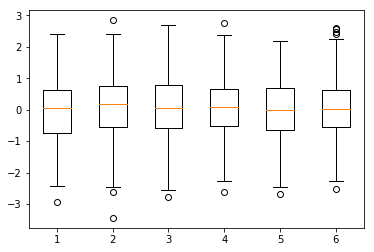

In [12]:
plt.boxplot(x = [features['1'],features['7'],features['21'],features['63'],features['105'],features['203']])
plt.show()

In [13]:
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa28280bac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa28280be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa282891e80>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa282815828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa282815b70>,
 'means': []}

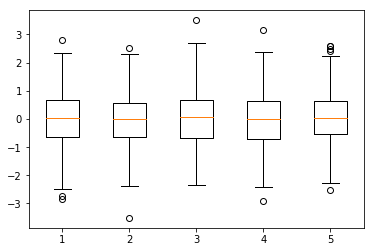

In [14]:
plt.boxplot(x = [features['5'], features['15'],features['45'],features['125'],features['203']])

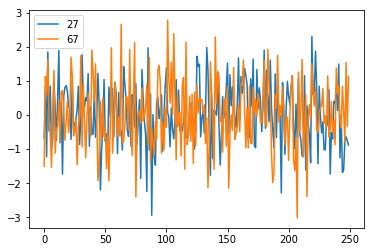

In [15]:
plt.figure()
plt.plot(features['27'])
plt.plot(features['67'])
plt.legend()

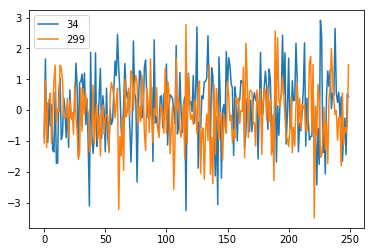

In [16]:
plt.plot(features['34'])
plt.plot(features['299'])
plt.legend()

We selected random features and plotted them. The features seem to be normalised in the range [-3.5,+3.5]

In [17]:
corr = data.corr()

In [18]:
corr.loc[corr['target']>0.1]

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
target,-0.151498,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.029519,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
13,0.039857,0.107828,0.049368,-0.111360,-0.073799,-0.041555,-0.054940,0.053074,-0.028456,-0.129851,...,0.067172,-0.046984,-0.039332,-0.020716,-0.039562,-0.062818,-0.043391,0.064835,-0.047400,0.000047
17,-0.037290,0.110998,0.013264,-0.115217,-0.019571,-0.025095,-0.096988,-0.131270,0.030455,0.039841,...,0.058518,-0.067853,-0.067064,0.047982,0.034879,-0.122605,-0.000236,0.053383,0.068385,-0.111602
24,0.033948,0.173096,-0.030686,0.069004,0.002037,-0.058211,0.008885,0.027247,0.028545,0.020165,...,0.105075,-0.015667,0.020669,0.008645,0.033071,0.036107,-0.115851,0.016726,-0.080493,-0.066220
30,-0.066357,0.132705,0.079281,0.022960,-0.150335,-0.021002,0.133551,-0.006420,0.043679,-0.009042,...,0.051923,-0.018193,-0.086934,0.018091,-0.040040,-0.021804,0.076440,0.103994,-0.098795,-0.058891
33,-0.061442,0.373608,0.077961,-0.029111,-0.005696,-0.080824,-0.098663,-0.001369,-0.036091,-0.019799,...,0.029973,0.094062,-0.043754,0.046774,-0.038299,0.035106,0.017139,0.054174,-0.062856,-0.027067
65,0.004333,0.293846,-0.008203,-0.033809,-0.010196,0.038706,-0.006212,-0.063151,-0.059622,-0.008603,...,-0.017998,0.004426,-0.083451,0.062713,0.002922,-0.137809,-0.041061,-0.014395,-0.042765,-0.009762
101,-0.083957,0.118379,0.039059,-0.023903,0.080992,-0.027281,-0.059944,0.059011,-0.049998,0.132843,...,0.034189,-0.048411,0.044579,0.106723,-0.102317,0.006123,0.052391,-0.048982,0.107234,0.090347
105,0.045938,0.110589,-0.036070,-0.020643,-0.049418,0.056790,-0.112774,0.003644,0.070755,-0.079543,...,0.121834,-0.011073,0.080306,-0.006930,-0.083802,-0.110927,0.010975,0.088781,0.033571,0.105387


In [19]:
g1 = features.loc[target == 0,['33','65']]
g2 = features.loc[target == 0,['5','6']]
g3 = features.loc[target == 0,['55','109']]

In [20]:
h1 = features.loc[target == 1,['33','65']]
h2 = features.loc[target == 1,['5','6']]
h3 = features.loc[target == 1,['55','109']]

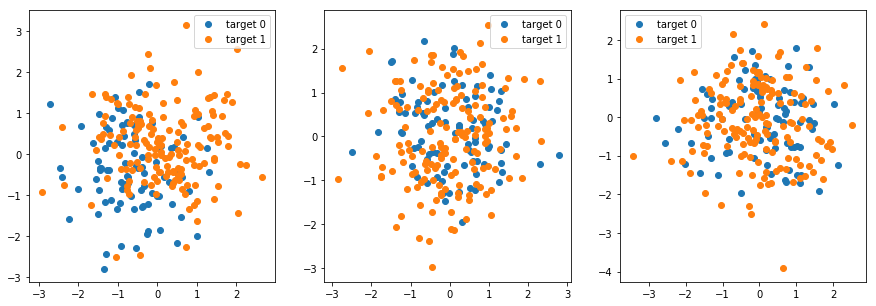

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.scatter(x = g1['33'], y = g1['65'],label = 'target 0')
plt.scatter(x = h1['33'], y = h1['65'],label = 'target 1')
plt.legend()
plt.subplot(132)
plt.scatter(x = g2['5'], y = g2['6'],label = 'target 0')
plt.scatter(x = h2['5'], y = h2['6'],label = 'target 1')
plt.legend()
plt.subplot(133)
plt.scatter(x = g3['55'], y = g3['109'],label = 'target 0')
plt.scatter(x = h3['55'], y = h3['109'],label = 'target 1')
plt.legend()

since columns '33' and '65' had the greatest correlation 0.3736 and 0.2938 with the target respectively, we plotted it to see how the data is scattered. we also tried by taking other random columns as well. 

The representation along with correlation value suggests that our features are only feebly able to classify the target.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [24]:
x_train.shape

(200, 300)

In [25]:
y_train.shape

(200,)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(C=1,penalty='l2', solver='liblinear')

'liblinear' solver is used for small datasets while others like 'sag', 'saga' are used for larget datasets.
penalty is the normalizer.

In [28]:
lr.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
lr.score(x_test,y_test)

0.7

In [30]:
Y_pred = lr.predict(x_test)

In [31]:
Y_pred

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,Y_pred)

array([[ 9,  2],
       [13, 26]])

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgd = SGDClassifier(max_iter = 250, tol = 1e-3)

On increasing the number of iterations, the model overfits and the accuracy decreases. On decreasing the tolerance the model overfits.

In [36]:
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=250,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
sgd.score(x_test,y_test)

0.82

In [38]:
Y_pred_sgd = sgd.predict(x_test)

In [39]:
confusion_matrix(y_test,Y_pred_sgd)

array([[ 9,  2],
       [ 7, 32]])

# Classifying using tensorflow backend and neural network

We see if we can improve the accuracy

In [40]:
import tensorflow as tf

In [41]:
x = tf.placeholder(tf.float32, shape = (None,300))
y = tf.placeholder(tf.float32, shape = (None,2))

In [42]:
weights ={
    'hidden': tf.Variable(tf.random_normal([300,10], seed = 109)),
    'output': tf.Variable(tf.random_normal([10,2],seed = 109))
}

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
weights

{'hidden': <tf.Variable 'Variable:0' shape=(300, 10) dtype=float32_ref>,
 'output': <tf.Variable 'Variable_1:0' shape=(10, 2) dtype=float32_ref>}

In [44]:
biases ={
    'hidden': tf.Variable(tf.random_normal([10], seed = 109)),
    'output': tf.Variable(tf.random_normal([2],seed = 109))
}

In [45]:
biases

{'hidden': <tf.Variable 'Variable_2:0' shape=(10,) dtype=float32_ref>,
 'output': <tf.Variable 'Variable_3:0' shape=(2,) dtype=float32_ref>}

In [46]:
hidden_layer = tf.add(tf.matmul(x, weights['hidden']),biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

In [47]:
output_layer = tf.add(tf.matmul(hidden_layer, weights['output']), biases['output'])

In [48]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer,labels =y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [49]:
optimiser = tf.train.AdagradOptimizer(learning_rate = 0.1,name='Adagrad_avoid_overfitting').minimize(cost)

In [50]:
correct_pred = tf.argmax(output_layer, 1)

In [51]:
score, count = tf.metrics.accuracy(correct_pred, y_test)

Instructions for updating:
Use tf.cast instead.


In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
y_train = y_train.values.reshape(-1,1)

In [54]:
y_train.shape

(200, 1)

In [55]:
ohe = OneHotEncoder(sparse = False)
y_train_encoded = ohe.fit_transform(y_train)
y_train_encoded.shape

/usr/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(200, 2)

In [56]:
y_train_encoded[0:4,0]

array([0., 0., 1., 0.])

In [57]:
import numpy as np
y_train_encoded = np.ndarray.tolist(y_train_encoded)

In [70]:
saver = tf.train.Saver()

In [71]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
i = 0
loss = sess.run(cost, feed_dict = {x:x_train, y:y_train_encoded})
while(loss>0.01):
    i = i + 1
    sess.run(optimiser, feed_dict = {x:x_train,y:y_train_encoded})
    if(i%20==0):
        print(sess.run(correct_pred, feed_dict = {x:x_test}))
        loss = sess.run(cost, feed_dict = {x:x_train, y:y_train_encoded})
        print('loss: ',loss)
print('Accuracy: ',sess.run(count, feed_dict = {x: x_test}))
save_path = saver.save(sess,'./avoid_overfitting_tfmodel.ckpt')
print('Model saved in path: %s' %save_path)
sess.close()

[0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0]
loss:  1.3330085
[0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0]
loss:  0.46910858
[0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0]
loss:  0.21778427
[0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1]
loss:  0.11042016
[0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.071669884
[0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.05292884
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.04255137
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.03617216
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0

[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.01058295
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.01055987
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.010537671
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.010516354
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.010496016
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.01047619
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.0104570845
[0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1]
loss:  0.010438655
[0 1 1 1 0 0 1 1 0 1 1 0 1